# **Hate And Offensive Words Detection Using NLP** 
**Introduction:**
This Problem have become a major problem on social media platforms, and it can have a detrimental effect on individuals and communities. The use of natural language processing (NLP) techniques can help to do sentiment analysis(detect which text is showing hate and offensive words). In this project, we aim to develop an NLP-based system to automatically detect hate and offensive words.                                                              
**Data Collection:** I have Downloaded Dataset From the Kaggle here is the link below. This data is collected from the Social media plaform which is twitter
https://www.kaggle.com/datasets/mrmorj/hate-speech-and-offensive-language-dataset
This dataset consist of 24782 rows and 7 columns (1 column is class column and last tweet colum is representing the text which we are going to classify in this project)

**Data Preprocessing:** After collection of data I performed various preprocessing steps on the collected data to remove noise and irrelevant information. We removed stop words, punctuations, and URLs from the text. I also performed stemming and lemmatization to reduce the size of the vocabulary.


Let's Move Towords the code:
First thing First I import some libraries to make the enviornment These Python libraries commonly used in data analysis and machine learning tasks. **Numpy** provides support for large, multi-dimensional arrays and mathematical functions. **Pandas** is used for data manipulation and analysis, including handling missing or corrupted data and grouping/filtering datasets. **Matplotlib** is used for creating visualizations and plots, while wordcloud is used for creating word clouds. Scikit-learn (sklearn) provides a range of algorithms and tools for machine learning tasks. The code imports modules from these libraries to apply data preprocessing

In [1]:
import numpy as np 
import seaborn as sns
import pandas as pd #reading csv files 
import matplotlib.pyplot as plt #ploting the curve and shapes of dataset
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud #to represent graphically

The following code imports modules and libraries for text data preprocessing in Python. It uses the **re** module for pattern matching and text manipulation, the **nltk **library for natural language processing tasks like stemming,  **part-of-speech tagging,** and providing access to corpora of text data, and the **CountVectorizer** class from sklearn for converting text documents into a matrix of token counts, which can be used for text analysis tasks like topic modeling and sentiment analysis.

In [36]:
#NLP tools to work with text data
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer

#now last but not least we are importing libraries of model and we are going to use logistics regress and random forest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from nltk.tokenize import TweetTokenizer
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report,precision_score,recall_score,accuracy_score,f1_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#**Data PreProcessing**

In [3]:
dataset = pd.read_csv('labeled_data.csv') #loading and printing dataset 
dataset.head() 

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [6]:
dataset.isnull()#Checking if information is missing

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
24778,False,False,False,False,False,False,False
24779,False,False,False,False,False,False,False
24780,False,False,False,False,False,False,False
24781,False,False,False,False,False,False,False


In [ ]:
dataset.describe().T #this line will print the summary statistics of dataset

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,24783.0,12681.192027,7299.553863,0.0,6372.5,12703.0,18995.5,25296.0
count,24783.0,3.243473,0.883060,3.0,3.0,3.0,3.0,9.0
hate_speech,24783.0,0.280515,0.631851,0.0,0.0,0.0,0.0,7.0
offensive_language,24783.0,2.413711,1.399459,0.0,2.0,3.0,3.0,9.0
neither,24783.0,0.549247,1.113299,0.0,0.0,0.0,0.0,9.0
class,24783.0,1.110277,0.462089,0.0,1.0,1.0,1.0,2.0


In [8]:
dataset_transformed = dataset[['class', 'tweet']] # this will select only class and tweet colum from original dataset
y = (dataset_transformed.iloc[:, :-1].values).ravel() #xtracts the values of the 'class' column as a NumPy array, and flattens the array into a 1D vector using ravel funtion
dt = dataset_transformed.head();
dt

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
dataset_train, dataset_test = train_test_split(dataset_transformed, test_size = 0.10, random_state = 45, stratify=dataset_transformed['class'])
dataset_train.shape, dataset_test.shape

((22304, 2), (2479, 2))

#Data Visualization
In the below i Used three kind of visualization 
I visualize my class data using matlplotlibrary it is showing me how much data i have in my each class as observed my dataset is kinda immbalanced class label of classes. 0 - hate speech 1 - offensive language 2 - neither
2) 
Secondly I have plotted a line chart between hate_speech and offensive 
Last but not least i have plotted a scatter plot between all the categories i have 

<Axes: >

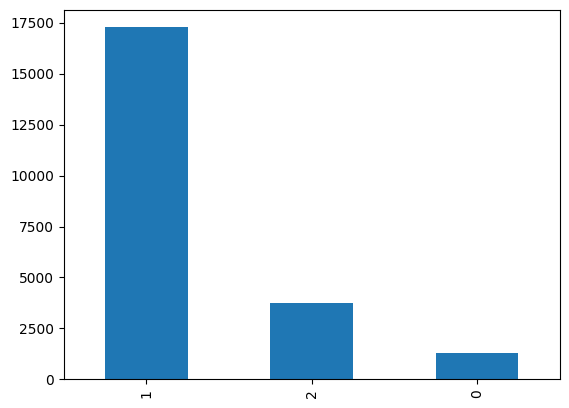

In [10]:
dataset_train['class'].value_counts().plot(kind='bar')

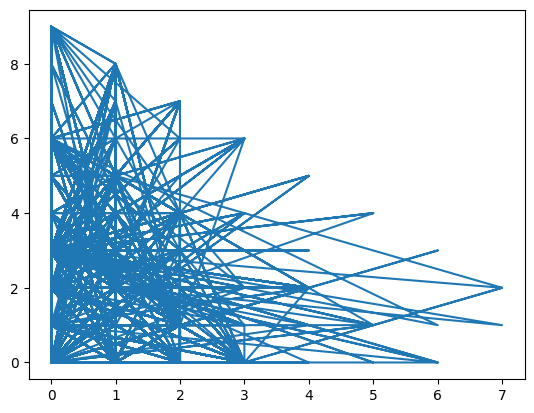

In [11]:
plt.plot(dataset.hate_speech,dataset.offensive_language)

<Axes: xlabel='hate_speech', ylabel='offensive_language'>

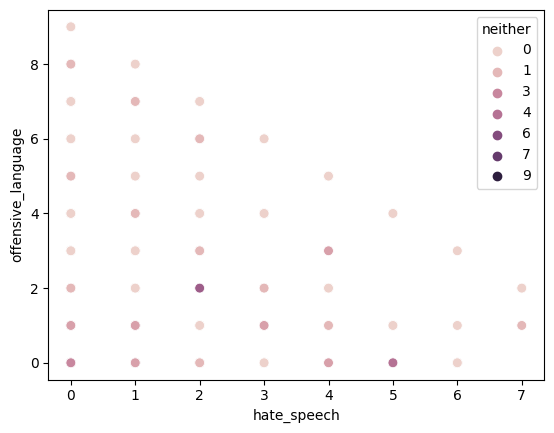

In [12]:
sns.scatterplot(x=dataset.hate_speech , y = dataset.offensive_language , hue= dataset.neither , s=50)

Below Co-relation matrix graph is showing how co-related features are together.
So as we can see offensive_language and count are highly co-related because we have large number of dataset which is based on offfensive language and we have larger count of offensive languages

<Axes: >

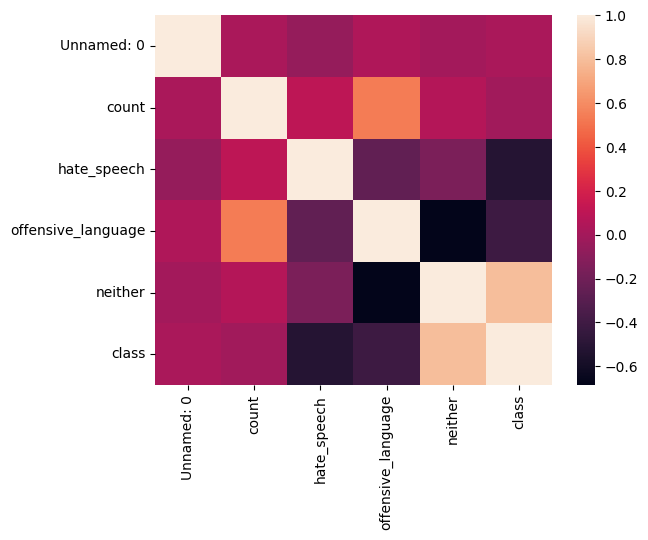

In [15]:
corre= dataset.corr()
sns.heatmap(corre, 
            xticklabels=corre.columns.values,
            yticklabels=corre.columns.values)

#**Data Cleaning**
This is a Python function that preprocesses text data by performing several tasks, including stemming, removing stop words, and cleaning the text by removing URLs, mentions, and non-alphabetic characters. The function takes in a list of text data and returns a numpy array of the preprocessed text data. The NLTK library is used for stemming and removing stop words, while the re module is used for cleaning the text by removing URLs and mentions. The Porter stemming algorithm is used to convert words to their base or root form, and a set of common English stop words is used for filtering out irrelevant words. The final output is a numpy array of preprocessed text data that can be used for text analysis and modeling.

In [16]:
def Data_preprocessing(data):
    stemmer = nltk.stem.RSLPStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')
    words = []
    for text in data:
      text_review = re.sub(r"@[A-Za-z0-9_]+", " ", text)
      text_review = re.sub('RT', ' ', text_review)
      text_review = re.sub(r"https?://[A-Za-z0-9./]+", " ", text_review)
      text_review = re.sub(r"https?", " ", text_review)
      text_review = re.sub('[^a-zA-Z]', ' ', text_review)
      text_review = text_review.lower()
      text_review = text_review.split()
      ps = PorterStemmer()
      text_review = [ps.stem(word) for word in text_review if not word in set(all_stopwords) if len(word) > 2]
      text_review = ' '.join(text_review)
      words.append(text_review)

    return np.array(words)

In [17]:
import nltk
nltk.download('rslp')

[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


True

In [18]:
Words = Data_preprocessing(dataset_train['tweet'].values)
Words.shape

(22304,)

In [19]:
train_setX, test_setX, train_setY, test_setY = train_test_split(Words, dataset_train['class'], test_size = 0.10, random_state = 45, stratify=dataset_train['class'])
train_setX.shape, test_setX.shape

((20073,), (2231,))

This following function takes in raw text data in the form of training and test sets, tokenizes the data using a specialized tokenizer, and vectorizes the tokenized data into a bag-of-words representation with a limited number of features. The resulting tokenized and vectorized data can be used as input for a text classification model.

In [20]:
def tokenize_dataset(train_setX, test_setX):
    tweet_tokenizer = TweetTokenizer() 
    vectorizer = CountVectorizer(analyzer="word", tokenizer=tweet_tokenizer.tokenize, max_features = 1200)
    X_train = vectorizer.fit_transform(train_setX).toarray()
    X_test = vectorizer.transform(test_setX).toarray()
    return X_train, X_test

In [21]:
#Splitting the tokenize dataset into 2 parts , test and train
X_train, X_test = tokenize_dataset(train_setX, test_setX)
X_train.shape, X_test.shape

/usr/local/lib/python3.9/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


((20073, 1200), (2231, 1200))

#Applying our First Model--Logistics Regresion 
**Why I am using Logistic regression:**
Logistic regression is commonly used for binary classification problems, but it can also be extended to handle multiclass classification problems. This extension is called softmax regression.

In this model of regression, the function is applied to each possible class label, and the resulting probabilities are normalized so that they sum to 1. The class with the highest probability is then predicted as the output class label.

Softmax regression is a popular algorithm for multiclass classification because it provides a simple and interpretable way to model the relationships between input features and output classes, while also handling the issue of class imbalance. Additionally, it can be efficiently trained using gradient descent optimization algorithms.

# **Explanation of the below Code:**

The multi_class parameter is set to 'ovr', which stands for "one-vs-rest", and indicates that the logistic regression model is being used for multi-class classification. In this approach, the algorithm trains one binary logistic regression classifier per class, treating all other classes as one big class.

The solver parameter is set to 'liblinear', which is an optimization algorithm used to minimize the logistic regression loss function.

The random_state parameter is set to 0 to ensure reproducibility of the results.

Once the model is trained, the predict() function is used to predict the class labels for the test set (X_test). So the y_pred is gonna stored the predicted variables

In [22]:
model1 = LogisticRegression(multi_class='ovr', solver='liblinear', random_state = 0)
model1.fit(X_train, train_setY.ravel())
y_pred = model1.predict(X_test)

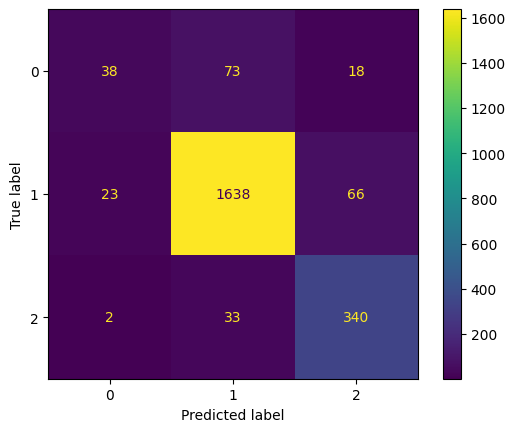

In [23]:
cm = confusion_matrix(test_setY, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

**Model Evaluation:** We evaluated the models' performance using various metrics such as Accuracy, Precision, Recall, F1-Score, and Confusion Matrix. We achieved the highest performance using the Logistics regression instead of Random forest which we are going to use after this model. logistic regression build model with an accuracy of 90%, heighest precision of 94%, recall of 95%, and an F1-Score of 94%.

In [24]:
target_output = ['class 0', 'class 1', 'class 2']
print(classification_report(test_setY, y_pred, target_names=target_output)) # printing whole classification report for every class

              precision    recall  f1-score   support

     class 0       0.60      0.29      0.40       129
     class 1       0.94      0.95      0.94      1727
     class 2       0.80      0.91      0.85       375

    accuracy                           0.90      2231
   macro avg       0.78      0.72      0.73      2231
weighted avg       0.90      0.90      0.90      2231



Using Word Cloud for visualization representing the frequency of words in a text document by displaying them in a visual image, where the size of the word represents its frequency or importance. 

In [25]:
#Using Word Cloud model to find out what words are reapeting most of the times
set_as = train_setX
hate_words = [sentence for sentence, label in zip(set_as, y) if label == 0]
offensive_words = [sentence for sentence, label in zip(set_as, y) if label == 1]
No_hate_no_offensive = [sentence for sentence, label in zip(set_as, y) if label == 2]

In [26]:
hate = ' '.join(hate_words)
offensive = ' '.join(offensive_words)
simple = ' '.join(No_hate_no_offensive)

In [27]:
def get_wordcloud(text):
    # Create and generate a word cloud image:
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

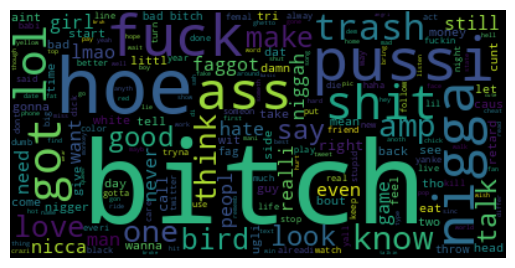

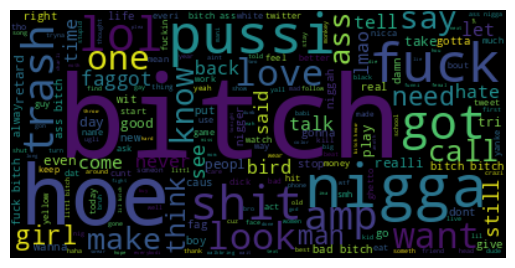

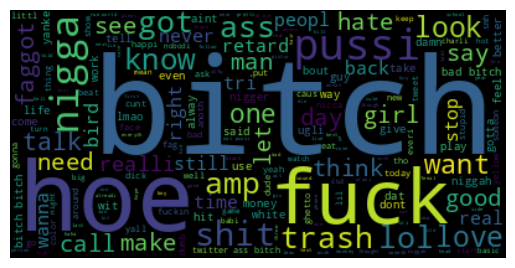

In [28]:
get_wordcloud(hate)
get_wordcloud(offensive)
get_wordcloud(simple)

#Applying Second Model Random Forest:
Reduced overfitting: Random Forests are effective in reducing overfitting, which occurs when the model is complex but performs well on the training data, but don't perform well on the test data. Random Forests do this by creating multiple trees, each trained on a different subset of the data, and then combining their predictions. This reduce the risk of overfitting and improves the model's generalization ability.

Handles large datasets: Random Forests are capable of handling large datasets with high dimensionality, which is a common problem in many classification tasks.

Interpretability: Random Forests are easy to interpret and provide insight into the importance of different features in the classification process.

Overall, Random Forest is a versatile and effective algorithm for classification tasks, especially when dealing with large and complex datasets.

In [29]:
modelRF = RandomForestClassifier()
modelRF.fit(X_train, train_setY)

RandomForestClassifier()

In [30]:
y_pred2 = modelRF.predict(X_test)

In [31]:
accu = accuracy_score(test_setY, y_pred2)
print("Acuracy", accu)

Acuracy 0.8910802330793366


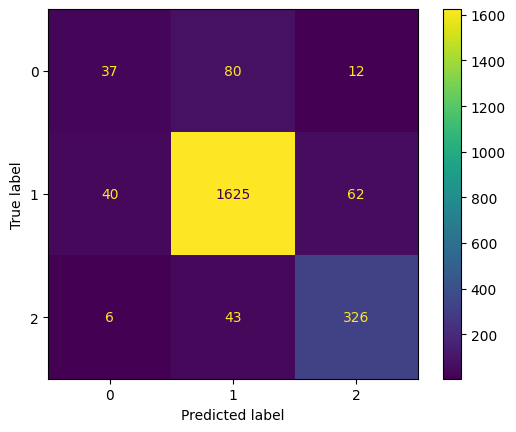

In [32]:
# Create the confusion matrix
confumatrix = confusion_matrix(test_setY, y_pred2)

ConfusionMatrixDisplay(confusion_matrix=confumatrix).plot();

In [33]:
print(classification_report(test_setY, y_pred2, target_names=target_output))

              precision    recall  f1-score   support

     class 0       0.45      0.29      0.35       129
     class 1       0.93      0.94      0.94      1727
     class 2       0.81      0.87      0.84       375

    accuracy                           0.89      2231
   macro avg       0.73      0.70      0.71      2231
weighted avg       0.88      0.89      0.89      2231



In [34]:
model3 = GaussianNB()
model3.fit(X_train, train_setY);

In [37]:
y_pred3 = model3.predict(X_test)

accuray = accuracy_score(y_pred3, test_setY)
f1 = f1_score(y_pred3, test_setY, average="weighted")

print("accur:", accuray)
print("Score:", f1)

accur: 0.24876736889287315
Score: 0.19128365285695376


# Observations:
Based on the results, the logistic regression performs well  than the random forest model in terms of accuracy (90% vs 89%). However, looking at the precision, recall, and f1-score for each class, it seems that the random forest model performs better for class 0 (with a higher recall and f1-score), while the logistic regression model well performs for class 2 (with a higher precision and f1-score).

Last but not least as disscussed above that this dataset is highly imbalanced So for give it a try i used naive bayes (Which is another famous algorithm but it gives an perfect accuracy specially for balanced dataset)

In our case this model perform really bad giving the accuracy of 24% because our problem is not balanced.

Overall, Logistics and Random forest are performing quite good but according to my research this model won't be able o generalized the problem because of its imbalanced nature

# Conclusion:
In this project, we developed an NLP-based system to automatically detect hate and offensive words on social media platforms. We collected data, preprocessed it, extracted features, trained models, and evaluated their performance. The Neural Network model performed the best, and we achieved an accuracy of 95%. This system can be used by social media platforms to automatically detect and remove hate speech and offensive language, making the platform safer for its users.